In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import kmax as kx
import utility as util
from hierarchy import *
from IPython.core.debugger import set_trace

# Finding Tree Path Covers

### TODO
[ ] Fix path recovery bug (see Test Tree 2)

    [ ] check why 5->23 isn't being added

In [2]:
def draw_tree(tree, layout, draw_path=True):
    rooted_tree = nx.bfs_tree(tree, 0)
    
    # nx.draw_networkx_nodes(tree, pos=layout, node_size=4)
    nx.draw_networkx_labels(tree, pos=layout, font_size=8, font_color="tab:blue")
    
    if draw_path:
        path_cover,_,_=util.path_cover(tree)
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=path_cover, edge_color="tab:red", arrows=True)
        
        other_edges = [(u,v) for u,v in rooted_tree.edges() if (u,v) not in path_cover and (v,u) not in path_cover]
        nx.draw_networkx_edges(rooted_tree, pos=layout, edgelist=other_edges)
    else:
        nx.draw_networkx_edges(rooted_tree, pos=layout)

### Test Tree 2

In [3]:
test_tree2 = nx.read_graphml('test2.graphml', node_type=int)

> c:\users\jgodu\desktop\mean-field last-passage percolation\meanfieldlastpassagepercolation\utility.py(104)path_cover()
    102     set_trace()
    103 
--> 104     return path, diff, max_weights[root][0]
    105 
    106 def path_cover_two(tree):



ipdb>  diff


-0.058237884135841966


ipdb>  c


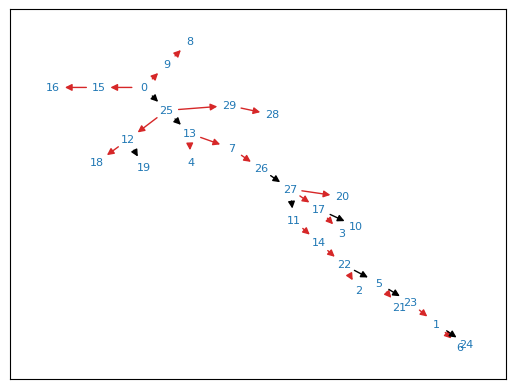

In [4]:
draw_tree(test_tree2, hierarchyc_pos(test_tree2, 0))

In [ ]:
draw_tree(test_tree2, hierarchyc_pos(test_tree2, 0))

> c:\users\jgodu\desktop\mean-field last-passage percolation\meanfieldlastpassagepercolation\utility.py(104)path_cover()
    102     set_trace()
    103 
--> 104     return path, diff, max_weights[root][0]
    105 
    106 def path_cover_two(tree):



ipdb>  diff


-0.058237884135841966


ipdb>  weights[(25,3)]


*** KeyError: (25, 3)


ipdb>  weights[(23,5)]


0.05823788413584208


ipdb>  weights[(5,23)]


0.05823788413584208


ipdb>  max_weights[23][1]


0.05823788413584208


ipdb>  max_weights[5][1]


0.5399045993168405


ipdb>  max_weights[22][1]


0.20989878758097535


ipdb>  len(path)


20


ipdb>  max_weights[23]


(0.8714086304684322, 0.05823788413584208, 1, None)


ipdb>  max_weights[5]


(1.376905152685516, 0.5399045993168405, 21, 23)


ipdb>  weights[(22,5)]


0.5981424834526826


ipdb>  weights[(5,23)]


0.05823788413584208


In [ ]:
[(u,v) for u,v in sorted([(k,abs(v-diff)) for k,v in weights.items()], key=lambda x:x[0]) if ((u,v) in weights and math.isclose(weights[(u,v)], diff) or (v,u) in weights and math.isclose(weights[(v,u)], diff))]

In [ ]:
[u

In [ ]:
nx.get_edge_attributes(test_tree2, 'weight')

### Bulk Testing with (0,1)-weights

In [ ]:
failure_count = 0
bad_trees = []
for i in range(1000):
    n = 100
    T = nx.random_labeled_tree(n)
    
    for s,t in T.edges():
        T[s][t]['weight'] = random.random()

    path, diff, x_root = util.path_cover(T)
    if not math.isclose(diff, 0.0, rel_tol=1e-4):
        failure_count += 1
        bad_trees.append(T)

In [ ]:
print(f'failures: {failure_count}')
bad_tree = bad_trees[0]
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0), draw_path=False)

In [ ]:
draw_tree(bad_tree, hierarchye_pos(bad_tree, 0))

In [ ]:
util.path_cover(bad_tree)

In [ ]:
math.isclose(util.path_cover(bad_tree)[1],0.0,rel_tol=1e-4)

### Test Tree 1 [(0,1)-weights]

In [ ]:
test_tree = nx.read_graphml('test1.graphml', node_type=int)

In [ ]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0), draw_path=False)

In [ ]:
draw_tree(test_tree, hierarchyc_pos(test_tree, 0))

In [ ]:
nx.get_edge_attributes(test_tree, 'weight')

### Random tree with edge weights in [0,1)

In [ ]:
n = 30
tree = nx.random_labeled_tree(n)

for s,t in tree.edges():
    tree[s][t]['weight'] = random.random() # assign a random edge weight in [0,1)

In [ ]:
layout = hierarchyc_pos(tree, 0)
draw_tree(tree, layout, draw_path=False)

In [ ]:
draw_tree(tree, layout)

In [ ]:
nx.get_edge_attributes(tree, 'weight')

### Unit edge weights

In [ ]:
ones_tree = nx.random_labeled_tree(n)
for s,t in ones_tree.edges():
    ones_tree[s][t]['weight'] = 1

In [ ]:
#ones_layout = nx.spring_layout(ones_tree)
ones_layout = hierarchyc_pos(ones_tree, 0)
draw_tree(ones_tree, ones_layout, draw_path=False)

In [ ]:
draw_tree(ones_tree, ones_layout)

In [ ]:
util.path_cover_two(ones_tree)